In [1]:
import numpy as np
from scipy import *
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from xppcall import xpprun
import networkx as nx
import conley_functions as cf
import subprocess

In [2]:
delta = 1
epsilon = 0.4
#check legal:
print(epsilon<delta/(1+delta))
N=5
# W = -2*np.ones((N,N))
wi=-1-delta
we=-1+epsilon
W = np.array([[0,wi,we],
              [we,0,wi],
              [wi,we,0]])
W = np.array([[0,wi,we,we,wi],
              [we,0,wi,we,wi],
              [wi,we,0,wi,wi],
              [wi,wi,wi,0,we],
              [wi,we,wi,wi,0]])
bs = np.ones(N)
dt=0.1
wcstring = cf.make_ctln(W, bs, dt=dt)
with open('ctln_p.ode', 'w') as f:
    f.writelines(wcstring)

True


In [3]:
np.linalg.det(np.array([[1,2,0.6],[1,1,2],[1,0.6,1]]))

1.5599999999999996

In [4]:
np.linalg.eig(-np.ones(N)+W)

(array([-11.04665467+0.j        ,   1.39266412+1.62765945j,
          1.39266412-1.62765945j,   1.26132644+0.j        ,
          2.        +0.j        ]),
 array([[-0.41342414+0.j        , -0.07401563-0.41425583j,
         -0.07401563+0.41425583j, -0.62281732+0.j        ,
         -0.48467653+0.j        ],
        [-0.41932185+0.j        , -0.58098648+0.j        ,
         -0.58098648-0.j        ,  0.30378725+0.j        ,
          0.19131968+0.j        ],
        [-0.46838513+0.j        ,  0.18767424+0.3548644j ,
          0.18767424-0.3548644j , -0.13391854+0.j        ,
         -0.48467653+0.j        ],
        [-0.46312029+0.j        ,  0.23905318-0.3254556j ,
          0.23905318+0.3254556j ,  0.69566051+0.j        ,
          0.67599621+0.j        ],
        [-0.46838513+0.j        ,  0.18767424+0.3548644j ,
          0.18767424-0.3548644j , -0.13391854+0.j        ,
          0.19131968+0.j        ]]))

<IPython.core.display.Javascript object>


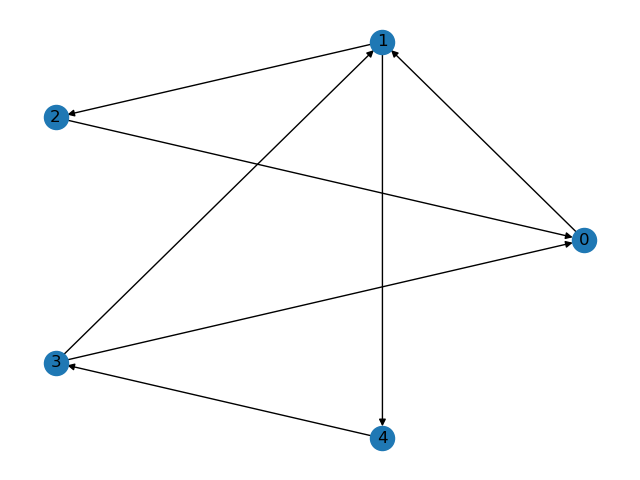

array([[0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [7]:
%matplotlib notebook

G=nx.from_numpy_matrix(np.where(np.logical_and(W>-1,W<0),1,0).T,create_using=nx.DiGraph())
nx.draw_circular(G, with_labels=True)
np.where(np.logical_and(W>-1,W<0),1,0).T

In [54]:
inits = [.1,.1,.0,.0,.1]#.0001*np.ones(N)#[5/18,5/18,5/18,5/18,5/18]
inits_dict={}
for i,init in enumerate(inits[:]):
    inits_dict['x'+str(i+1)]=init
%matplotlib notebook
npa, vn = xpprun('ctln_p.ode',inits=inits_dict, parameters={'total':500}, clean_after=True)
plt.plot(npa[:,1], npa[:,2])

xpp was not called properly. check that xpp is installed and its alias.


TypeError: cannot unpack non-iterable NoneType object

<IPython.core.display.Javascript object>


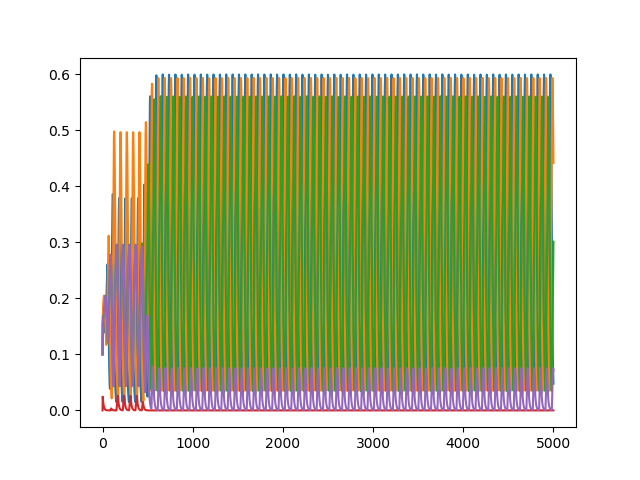

In [52]:
%matplotlib notebook

plt.plot(npa[:,1:])

In [313]:
x=npa[-1,1:]
x

array([0.0024277 , 0.41681799, 0.05343399, 0.04260871, 0.33358085])

In [219]:
x[1]*wi+x[2]*we+1-x[0]

-4.4000000087862645e-08

In [220]:
we,wi

(-0.6, -2)

<IPython.core.display.Javascript object>


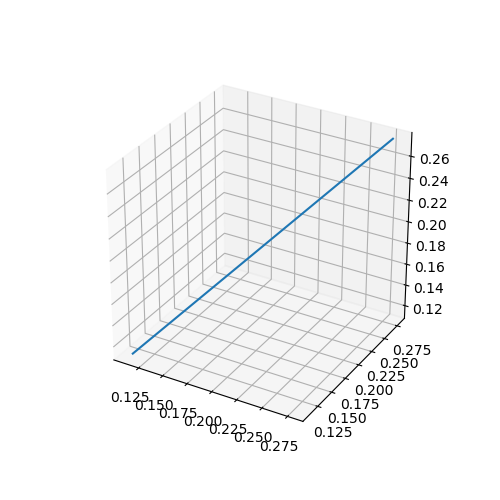

In [221]:
%matplotlib notebook

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot(npa[:,1], npa[:,2],npa[:,3])